<a href="https://colab.research.google.com/github/zhihaolaw/SC1015/blob/main/SC1015_mini_project_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

Mounted at /content/gdrive


In [2]:
life_expectancy_dt = pd.read_csv("gdrive/My Drive/Life_Expectancy_Data.csv")
regions = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
        "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
        "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea",
        "Eritrea", "Swaziland", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea",
        "Guinea-Bissau", "Côte d'Ivoire", "Kenya", "Lesotho", "Liberia", "Libya",
        "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Congo",
        "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone",
        "Somalia", "South Africa", "South Sudan", "Sudan", "United Republic of Tanzania", "Togo",
        "Tunisia", "Uganda", "Zambia", "Zimbabwe","Sao Tome and Principe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
        "Brunei Darussalam", "Cambodia", "China", "Georgia", "India", "Indonesia",
        "Iran (Islamic Republic of)", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan",
        "Kuwait", "Kyrgyzstan", "Lao People's Democratic Republic", "Lebanon", "Malaysia", "Maldives", "Mongolia",
        "Myanmar", "Nepal", "Democratic People's Republic of Korea", "Oman", "Pakistan", "Palestine", "Philippines",
        "Qatar", "Saudi Arabia", "Singapore", "Republic of Korea", "Sri Lanka", "Syrian Arab Republic",
        "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan",
        "United Arab Emirates", "Uzbekistan", "Viet Nam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland",
        "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy",
        "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta",
        "Moldova", "Monaco", "Montenegro", "Netherlands", "The former Yugoslav republic of Macedonia", "Norway",
        "Poland", "Portugal", "Romania", "Russian Federation", "San Marino", "Serbia", "Slovakia",
        "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom of Great Britain and Northern Ireland", "Vatican City", "Republic of Moldova"
    ],
    "North America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica",
        "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis",
        "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States of America"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia (Federated States of)",
        "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands",
        "Tonga", "Tuvalu", "Vanuatu", "Cook Islands", "Niue"
    ],
    "South America": [
        "Argentina", "Bolivia (Plurinational State of)", "Brazil", "Chile", "Colombia",
        "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela (Bolivarian Republic of)"
    ]
}

dict_cond_values= {key:life_expectancy_dt['Country'].isin(regions[key]) for key in regions}
life_expectancy_dt['Region']=np.select(dict_cond_values.values(),dict_cond_values.keys())
life_expectancy_dt.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


In [3]:
#life_expectancy_dt = pd.read_csv("gdrive/My Drive/Life_Expectancy_Data.csv")
#life_expectancy_dt.head()
#life_expectancy_dt.info()
#life_expectancy_dt['Country'].unique()

life_expectancy_dt = life_expectancy_dt.rename(columns=lambda x: x.upper().replace(' ', '_').replace('-', '_'))
#print(country)
#print(life_expectancy_dt)
life_expectancy_dt.head()

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY_,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES_,...,TOTAL_EXPENDITURE,DIPHTHERIA_,_HIV/AIDS,GDP,POPULATION,_THINNESS__1_19_YEARS,_THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING,REGION
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


In [4]:
life_expectancy_dt['REGION'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [5]:
import pandas as pd

df = pd.DataFrame(life_expectancy_dt)

# Filtering the DataFrame to get rows where the Region is '0'
region_0_df = life_expectancy_dt[life_expectancy_dt['REGION'] == '0']

# Getting the 'Value' column from the filtered DataFrame
values_in_region_0 = region_0_df['COUNTRY'].tolist()
print(values_in_region_0)

country_occurrences_in_region_0 = region_0_df['COUNTRY'].value_counts()
print(country_occurrences_in_region_0)

[]
Series([], Name: COUNTRY, dtype: int64)


In [6]:
life_expectancy_dt.isna().sum()

COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY_                    10
ADULT_MORTALITY                     10
INFANT_DEATHS                        0
ALCOHOL                            194
PERCENTAGE_EXPENDITURE               0
HEPATITIS_B                        553
MEASLES_                             0
_BMI_                               34
UNDER_FIVE_DEATHS_                   0
POLIO                               19
TOTAL_EXPENDITURE                  226
DIPHTHERIA_                         19
_HIV/AIDS                            0
GDP                                448
POPULATION                         652
_THINNESS__1_19_YEARS               34
_THINNESS_5_9_YEARS                 34
INCOME_COMPOSITION_OF_RESOURCES    167
SCHOOLING                          163
REGION                               0
dtype: int64

In [7]:
life_expectancy_dt.describe()

,YEAR,LIFE_EXPECTANCY_,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES_,_BMI_,UNDER_FIVE_DEATHS_,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA_,_HIV/AIDS,GDP,POPULATION,_THINNESS__1_19_YEARS,_THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<Axes: >

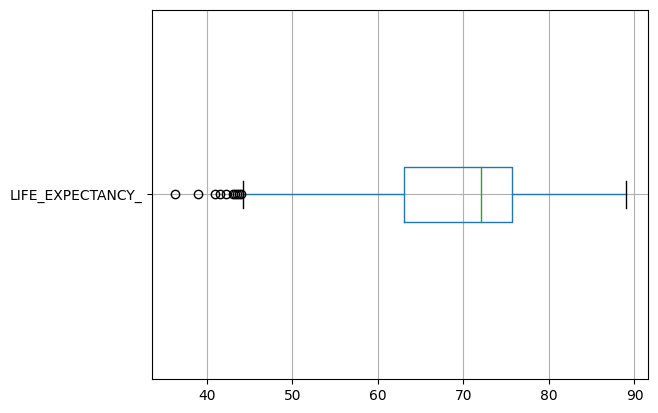

In [8]:
life_expectancy_dt.boxplot(['LIFE_EXPECTANCY_'], vert = 0)

In [9]:
life_expectancy_dt.nunique()

COUNTRY                             193
YEAR                                 16
STATUS                                2
LIFE_EXPECTANCY_                    362
ADULT_MORTALITY                     425
INFANT_DEATHS                       209
ALCOHOL                            1076
PERCENTAGE_EXPENDITURE             2328
HEPATITIS_B                          87
MEASLES_                            958
_BMI_                               608
UNDER_FIVE_DEATHS_                  252
POLIO                                73
TOTAL_EXPENDITURE                   818
DIPHTHERIA_                          81
_HIV/AIDS                           200
GDP                                2490
POPULATION                         2278
_THINNESS__1_19_YEARS               200
_THINNESS_5_9_YEARS                 207
INCOME_COMPOSITION_OF_RESOURCES     625
SCHOOLING                           173
REGION                                6
dtype: int64

In [10]:
percentage_of_Null_value = life_expectancy_dt.isnull().sum() * 100 / len(life_expectancy_dt)
print("Percentage of null value in each column:\n", round(percentage_of_Null_value,2))

Percentage of null value in each column:
 COUNTRY                             0.00
YEAR                                0.00
STATUS                              0.00
LIFE_EXPECTANCY_                    0.34
ADULT_MORTALITY                     0.34
INFANT_DEATHS                       0.00
ALCOHOL                             6.60
PERCENTAGE_EXPENDITURE              0.00
HEPATITIS_B                        18.82
MEASLES_                            0.00
_BMI_                               1.16
UNDER_FIVE_DEATHS_                  0.00
POLIO                               0.65
TOTAL_EXPENDITURE                   7.69
DIPHTHERIA_                         0.65
_HIV/AIDS                           0.00
GDP                                15.25
POPULATION                         22.19
_THINNESS__1_19_YEARS               1.16
_THINNESS_5_9_YEARS                 1.16
INCOME_COMPOSITION_OF_RESOURCES     5.68
SCHOOLING                           5.55
REGION                              0.00
dtype: float64


In [11]:
# Identify columns with missing values
missing_columns = life_expectancy_dt.columns[life_expectancy_dt.isnull().any()].tolist()

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
life_expectancy_dt[missing_columns] = imputer.fit_transform(life_expectancy_dt[missing_columns])

In [12]:
percentage_of_Null_value = life_expectancy_dt.isnull().sum() * 100 / len(life_expectancy_dt)
print("Percentage of null value in each column after KNNImputer:\n", round(percentage_of_Null_value,2))

Percentage of null value in each column after KNNImputer:
 COUNTRY                            0.0
YEAR                               0.0
STATUS                             0.0
LIFE_EXPECTANCY_                   0.0
ADULT_MORTALITY                    0.0
INFANT_DEATHS                      0.0
ALCOHOL                            0.0
PERCENTAGE_EXPENDITURE             0.0
HEPATITIS_B                        0.0
MEASLES_                           0.0
_BMI_                              0.0
UNDER_FIVE_DEATHS_                 0.0
POLIO                              0.0
TOTAL_EXPENDITURE                  0.0
DIPHTHERIA_                        0.0
_HIV/AIDS                          0.0
GDP                                0.0
POPULATION                         0.0
_THINNESS__1_19_YEARS              0.0
_THINNESS_5_9_YEARS                0.0
INCOME_COMPOSITION_OF_RESOURCES    0.0
SCHOOLING                          0.0
REGION                             0.0
dtype: float64


<ipython-input-13-1af3248c0abb>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = life_expectancy_dt.corr()


<Axes: >

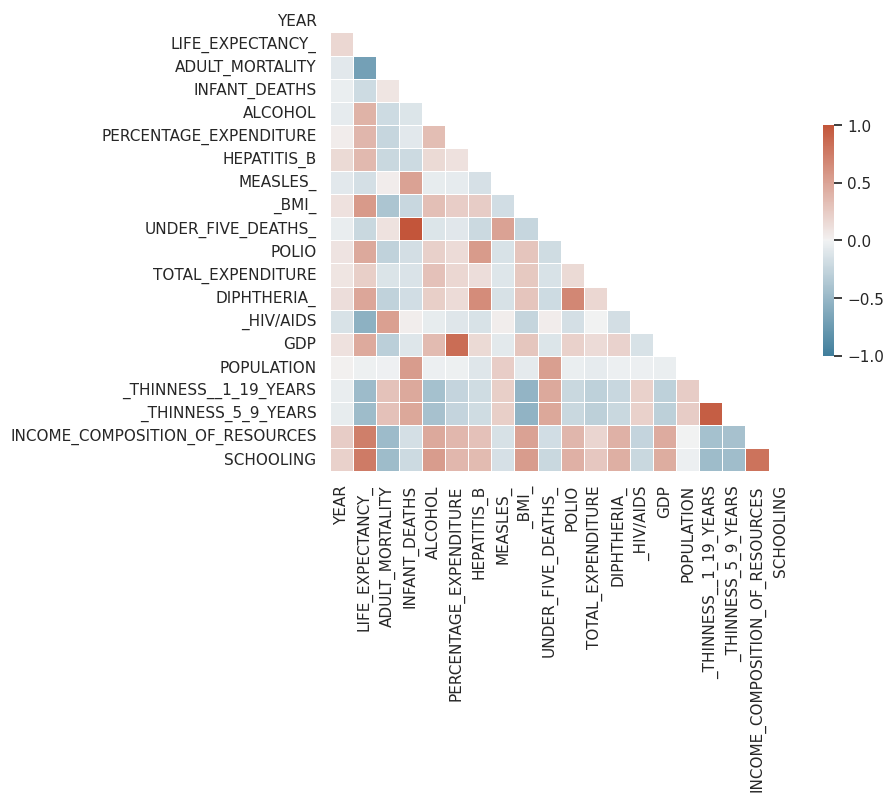

In [13]:
sns.set_theme(style="white")

# Generate a large random dataset with synthetic nature (categorical + numerical)
#data = sns.load_dataset("titanic")
#df = pd.DataFrame(data=data)

# Generate label column randomly '0' or '1'
#df['label'] = np.random.randint(0,2, size=len(df))

# Compute the correlation matrix
corr = life_expectancy_dt.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<ipython-input-14-cd970d63652a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = life_expectancy_dt.corr()


<Axes: >

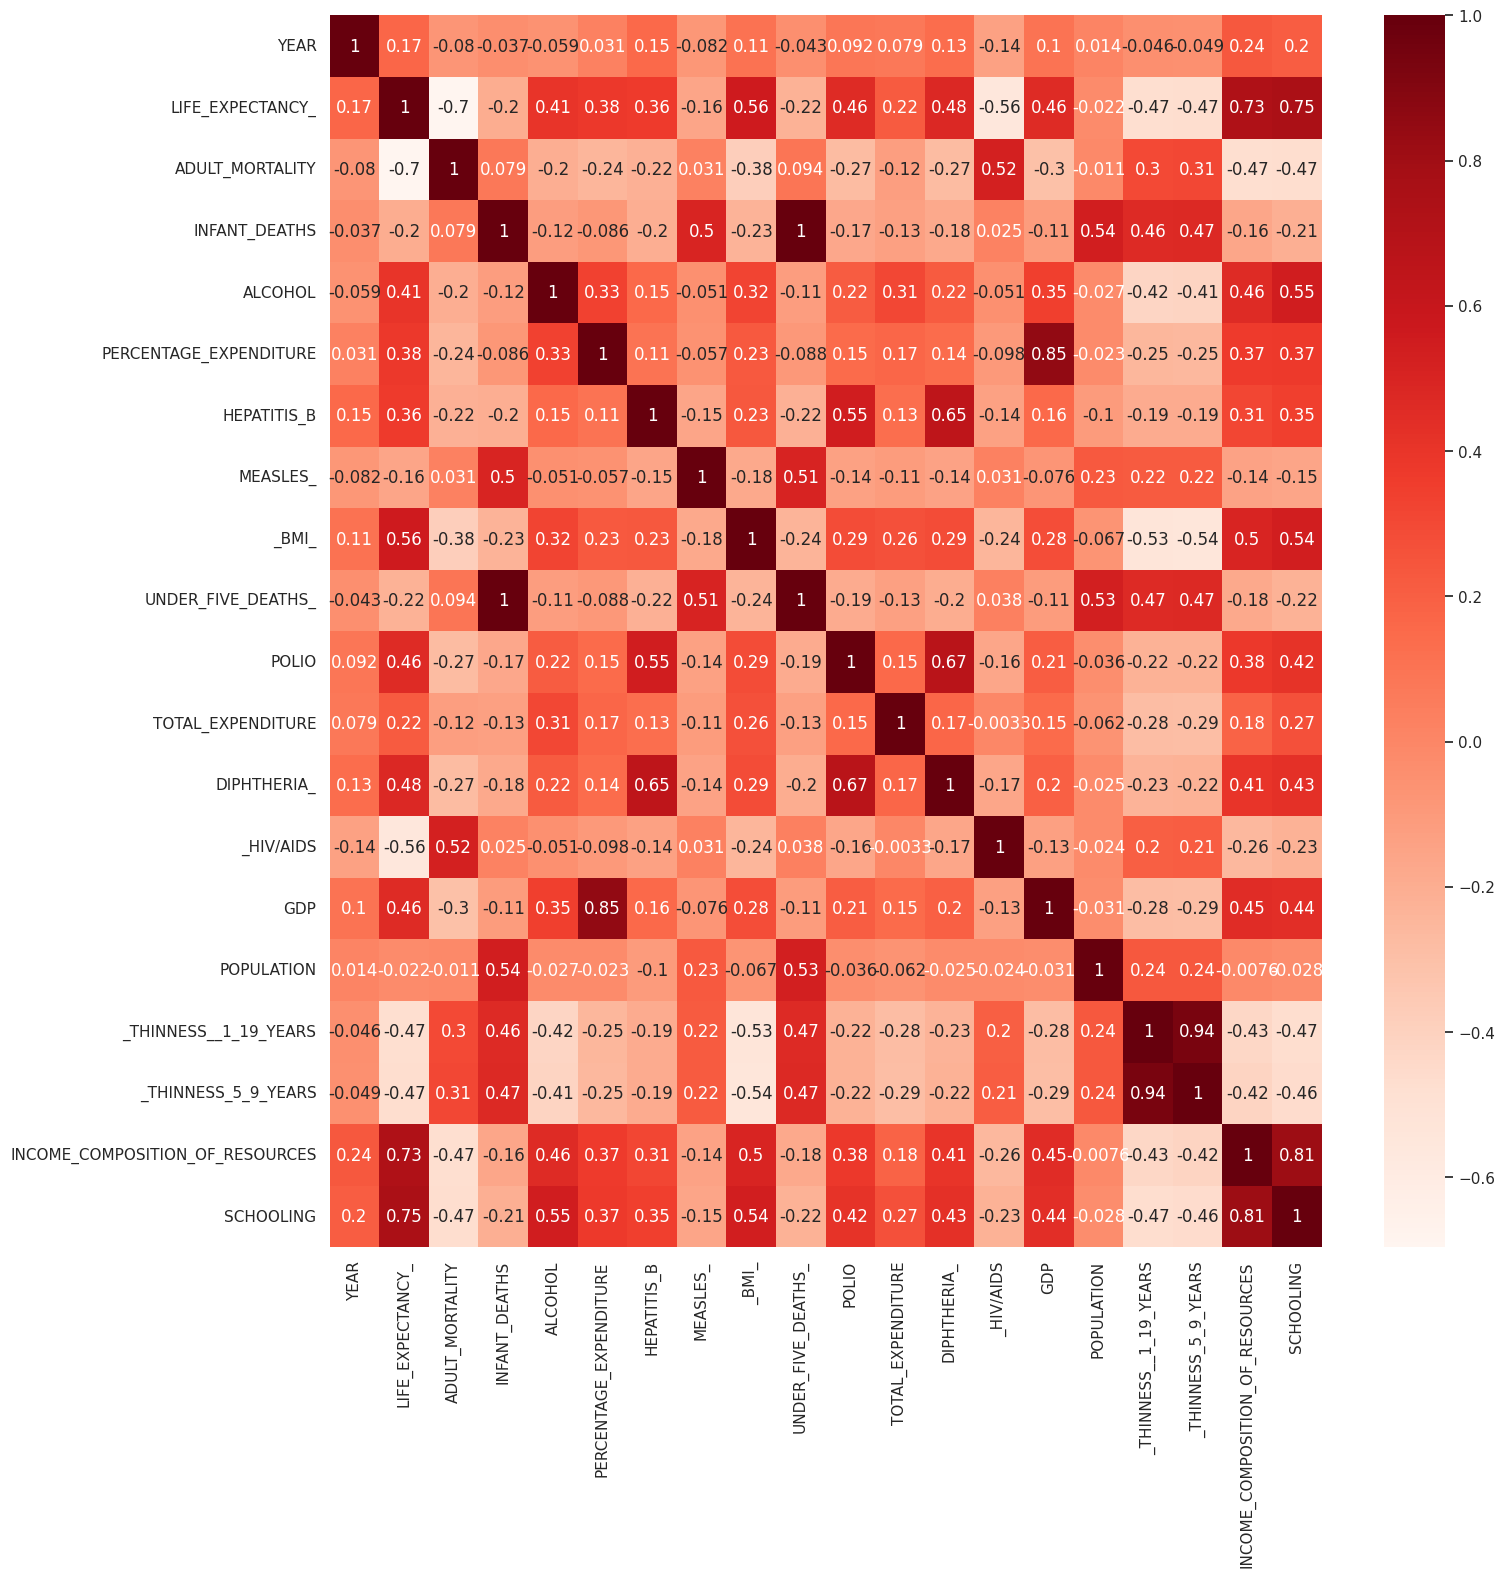

In [14]:
plt.figure(figsize=(16,16))
cor = life_expectancy_dt.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#import pandas as pd

# Define your features (X) and target variable (Y)
X = life_expectancy_dt[["SCHOOLING", "INCOME_COMPOSITION_OF_RESOURCES", "GDP", "DIPHTHERIA_", "_BMI_", "POLIO"]]
Y = life_expectancy_dt["LIFE_EXPECTANCY_"]

# Initialize SelectKBest with f_regression scoring function and k=5
KBest = SelectKBest(score_func=f_regression, k=5)

# Fit SelectKBest to your data
KBest.fit(X, Y)

# Create a DataFrame to display the scores and p-values
df_scores = pd.DataFrame({'features': X.columns, 'Score': KBest.scores_, 'pValue': KBest.pvalues_ })

print(df_scores)

                          features        Score         pValue
0                        SCHOOLING  3884.420729   0.000000e+00
1  INCOME_COMPOSITION_OF_RESOURCES  3421.192329   0.000000e+00
2                              GDP   782.504434  7.432354e-153
3                      DIPHTHERIA_   865.454255  6.144698e-167
4                            _BMI_  1339.528618  6.202281e-242
5                            POLIO   801.222457  4.633486e-156


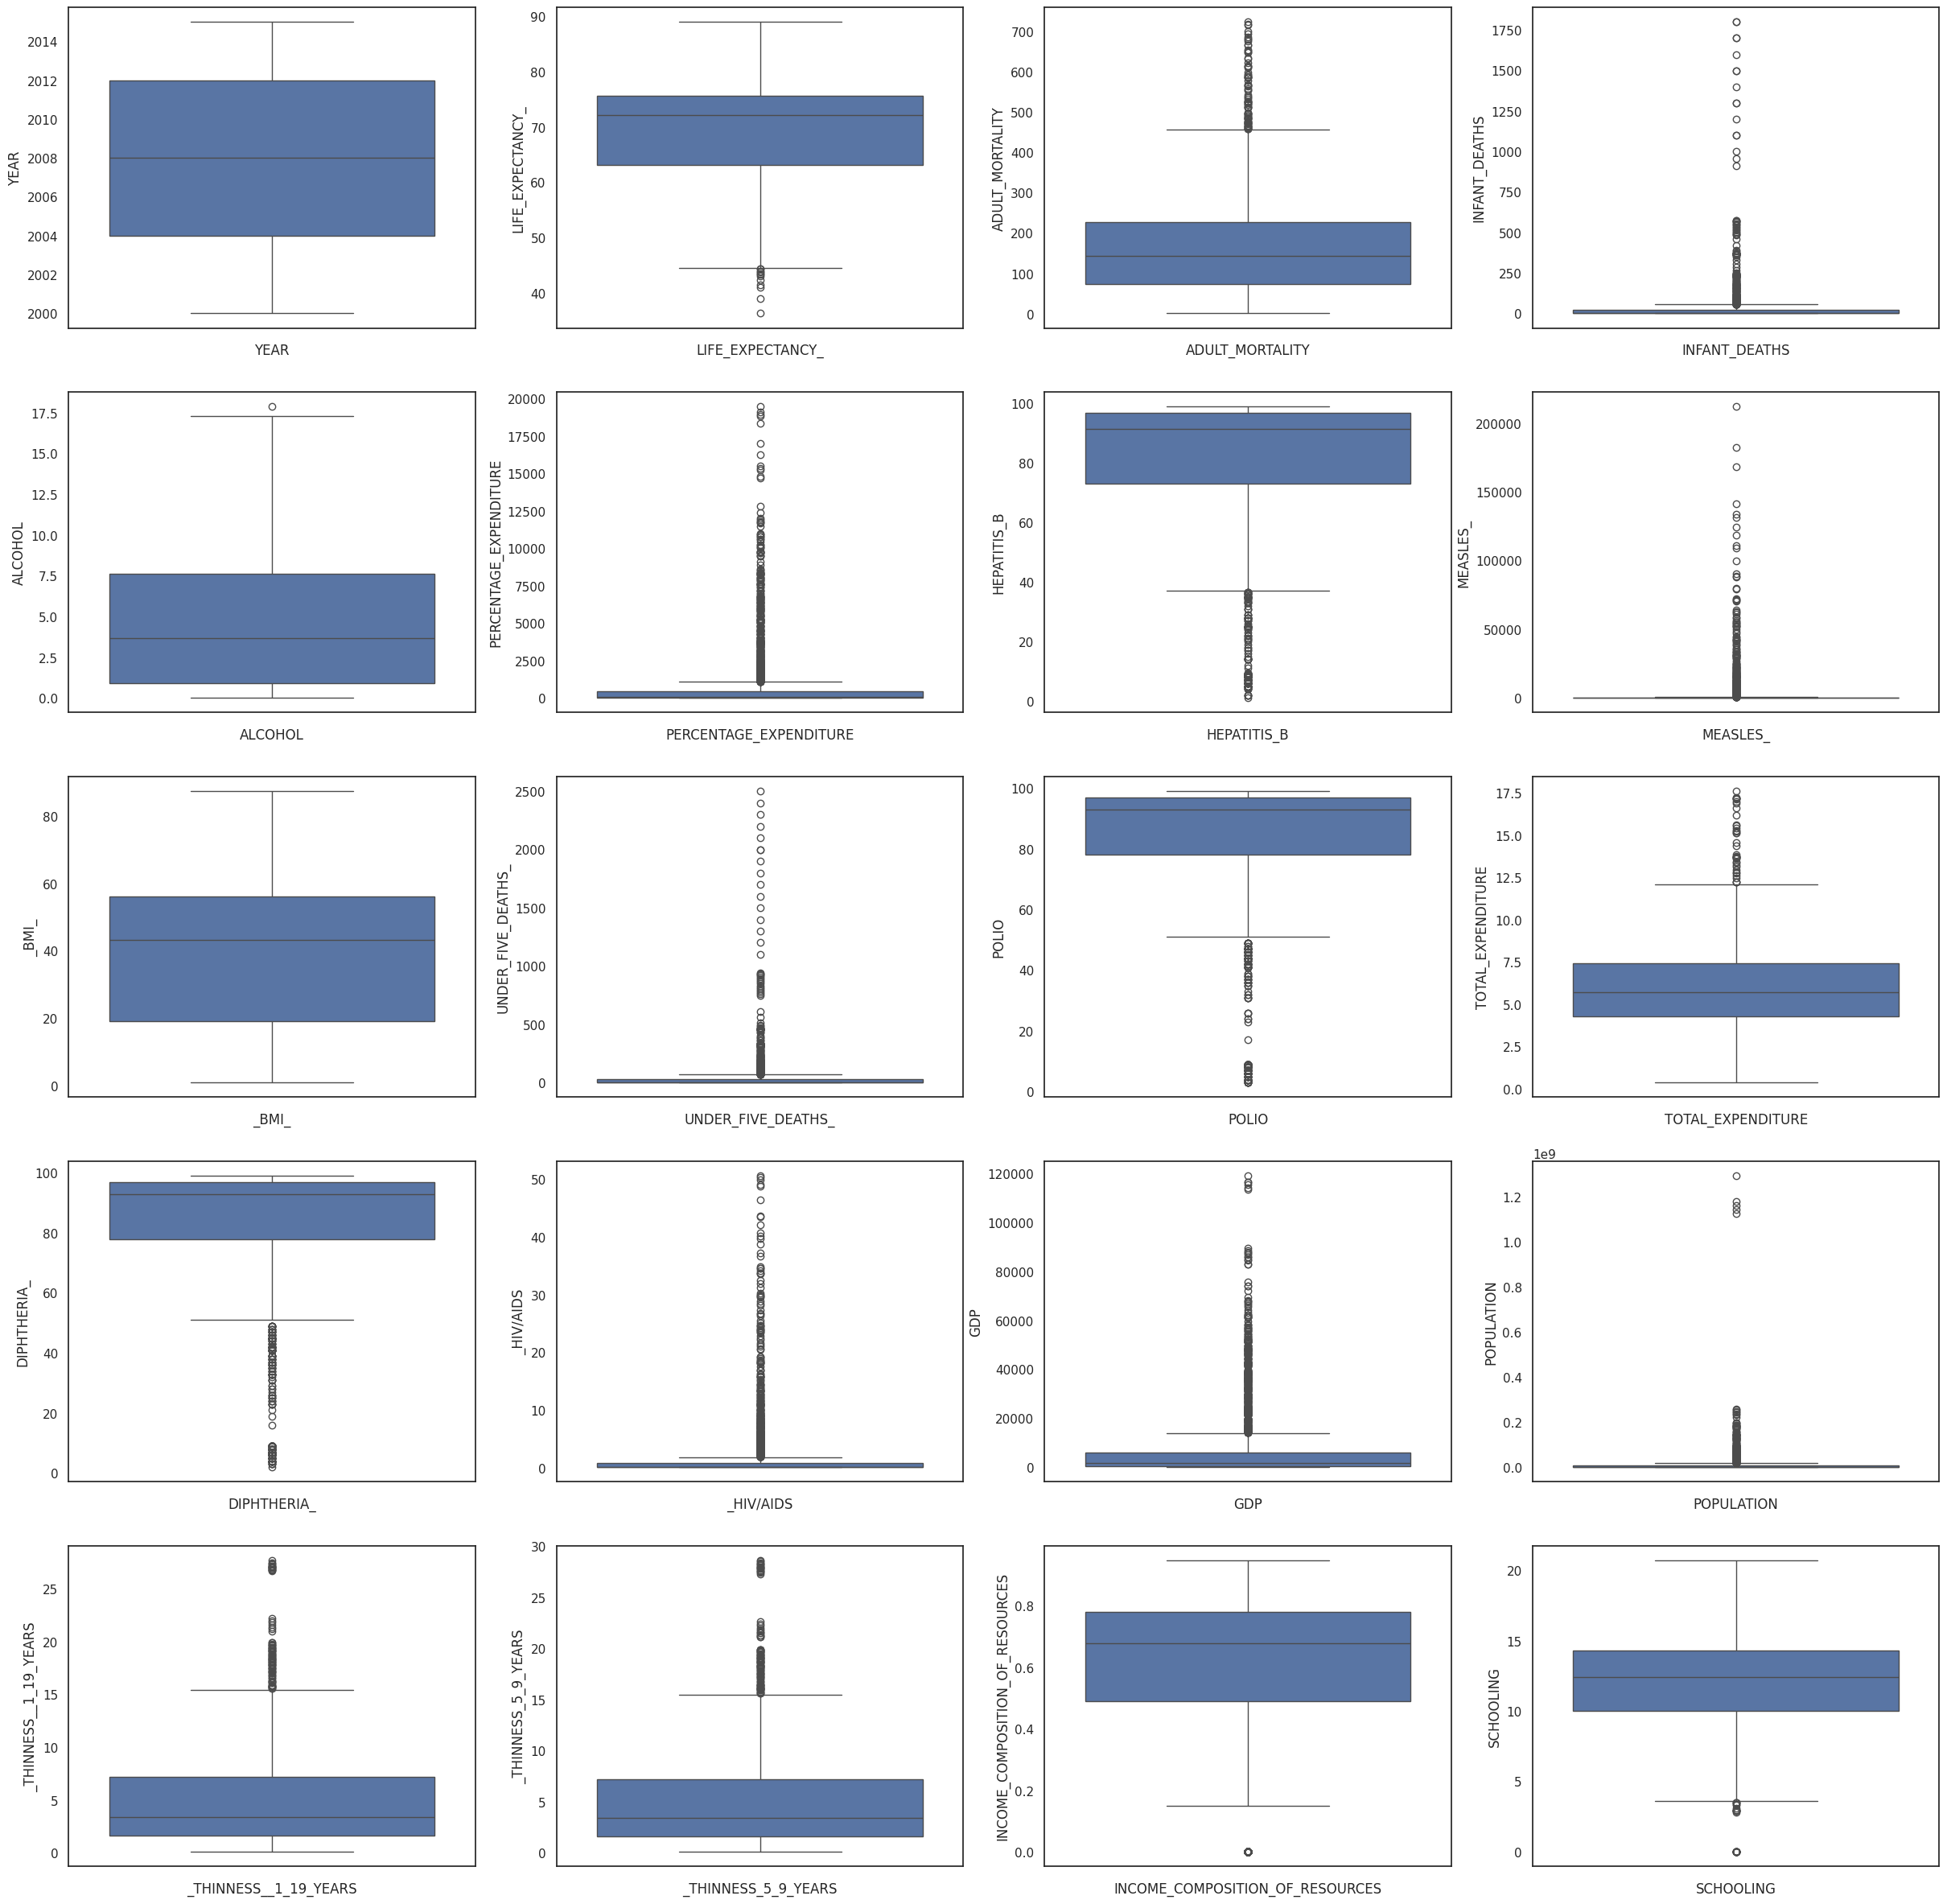

In [16]:
categorical_columns = []
numerical_columns =[]

for col in life_expectancy_dt.columns:
    if life_expectancy_dt[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

#print(categorical_columns)
#print(numerical_columns)

fig = plt.figure(figsize=(30,30))

counter = 0

for col in numerical_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.boxplot(data=life_expectancy_dt[col])
    plt.xlabel(col)
    counter = counter + 1

In [17]:
#plot histogram to see the distribution of dataset based on each variable

In [18]:
# Function to detect outliers using IQR approach
def detect_outliers(data_column):
    """
    Calculates IQR and identifies outliers.

    Args:
        data_column (pd.Series): The data column to analyze.

    Returns:
        list: A list of outliers.
    """

    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers.tolist()

# Calculate and store outlier counts and percentages
outlier_data = {}
for col in numerical_columns:
    outliers = detect_outliers(life_expectancy_dt[col])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(life_expectancy_dt[col])) * 100  # Calculate percentage
    outlier_data[col] = {'count': outlier_counts, 'percentage': outlier_percentages}

    #print(col)
    print(col,"->", "No. of IQR-based outliers:", outlier_counts)
    print("--------------------------------")

YEAR -> No. of IQR-based outliers: 0
--------------------------------
LIFE_EXPECTANCY_ -> No. of IQR-based outliers: 12
--------------------------------
ADULT_MORTALITY -> No. of IQR-based outliers: 85
--------------------------------
INFANT_DEATHS -> No. of IQR-based outliers: 315
--------------------------------
ALCOHOL -> No. of IQR-based outliers: 1
--------------------------------
PERCENTAGE_EXPENDITURE -> No. of IQR-based outliers: 389
--------------------------------
HEPATITIS_B -> No. of IQR-based outliers: 263
--------------------------------
MEASLES_ -> No. of IQR-based outliers: 542
--------------------------------
_BMI_ -> No. of IQR-based outliers: 0
--------------------------------
UNDER_FIVE_DEATHS_ -> No. of IQR-based outliers: 394
--------------------------------
POLIO -> No. of IQR-based outliers: 281
--------------------------------
TOTAL_EXPENDITURE -> No. of IQR-based outliers: 39
--------------------------------
DIPHTHERIA_ -> No. of IQR-based outliers: 300
------

In [19]:
# Replace outliers with column means (handle missing values appropriately)
for col in numerical_columns:
    outliers = detect_outliers(life_expectancy_dt[col])
    if outliers:  # Check if there are outliers before replacing
        mean_value = life_expectancy_dt[col].mean()  # Calculate mean (consider handling missing values)
        life_expectancy_dt.loc[life_expectancy_dt[col].isin(outliers), col] = mean_value  # Replace outliers with mean

In [20]:
life_expectancy_dt.skew()

<ipython-input-20-082a3f4dc2cd>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  life_expectancy_dt.skew()


YEAR                              -0.006409
LIFE_EXPECTANCY_                  -0.607923
ADULT_MORTALITY                    0.649321
INFANT_DEATHS                      1.210452
ALCOHOL                            0.596033
PERCENTAGE_EXPENDITURE             1.033098
HEPATITIS_B                       -1.344295
MEASLES_                           1.531992
_BMI_                             -0.214131
UNDER_FIVE_DEATHS_                 1.076820
POLIO                             -1.273696
TOTAL_EXPENDITURE                  0.216567
DIPHTHERIA_                       -1.232900
_HIV/AIDS                          1.183418
GDP                                1.006296
POPULATION                         1.030752
_THINNESS__1_19_YEARS              0.977097
_THINNESS_5_9_YEARS                0.948826
INCOME_COMPOSITION_OF_RESOURCES   -0.376343
SCHOOLING                         -0.255232
dtype: float64

Text(0, 0.5, 'Life Expectancy')

<Figure size 1600x600 with 0 Axes>

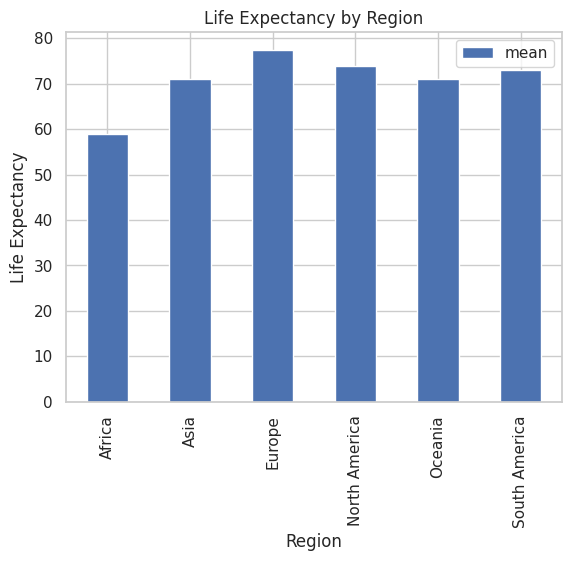

In [21]:
region = life_expectancy_dt["REGION"]
life_expectancy = life_expectancy_dt["LIFE_EXPECTANCY_"]

# Set style
sns.set(style="whitegrid")
# Create barplot
plt.figure(figsize=(16, 6))
ptsbyyear = life_expectancy_dt.groupby("REGION").agg({'LIFE_EXPECTANCY_': ['mean']}).reset_index()
ptsbyyear.plot(kind="bar", x="REGION", y="LIFE_EXPECTANCY_")
plt.title('Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')

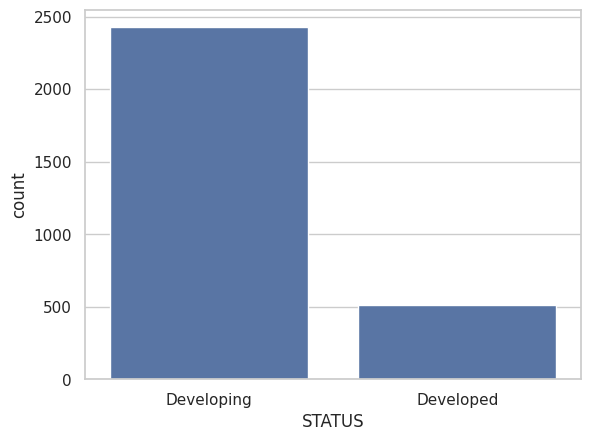

In [22]:
g = sns.countplot(x="STATUS",data=life_expectancy_dt)
plt.xticks()
plt.show()

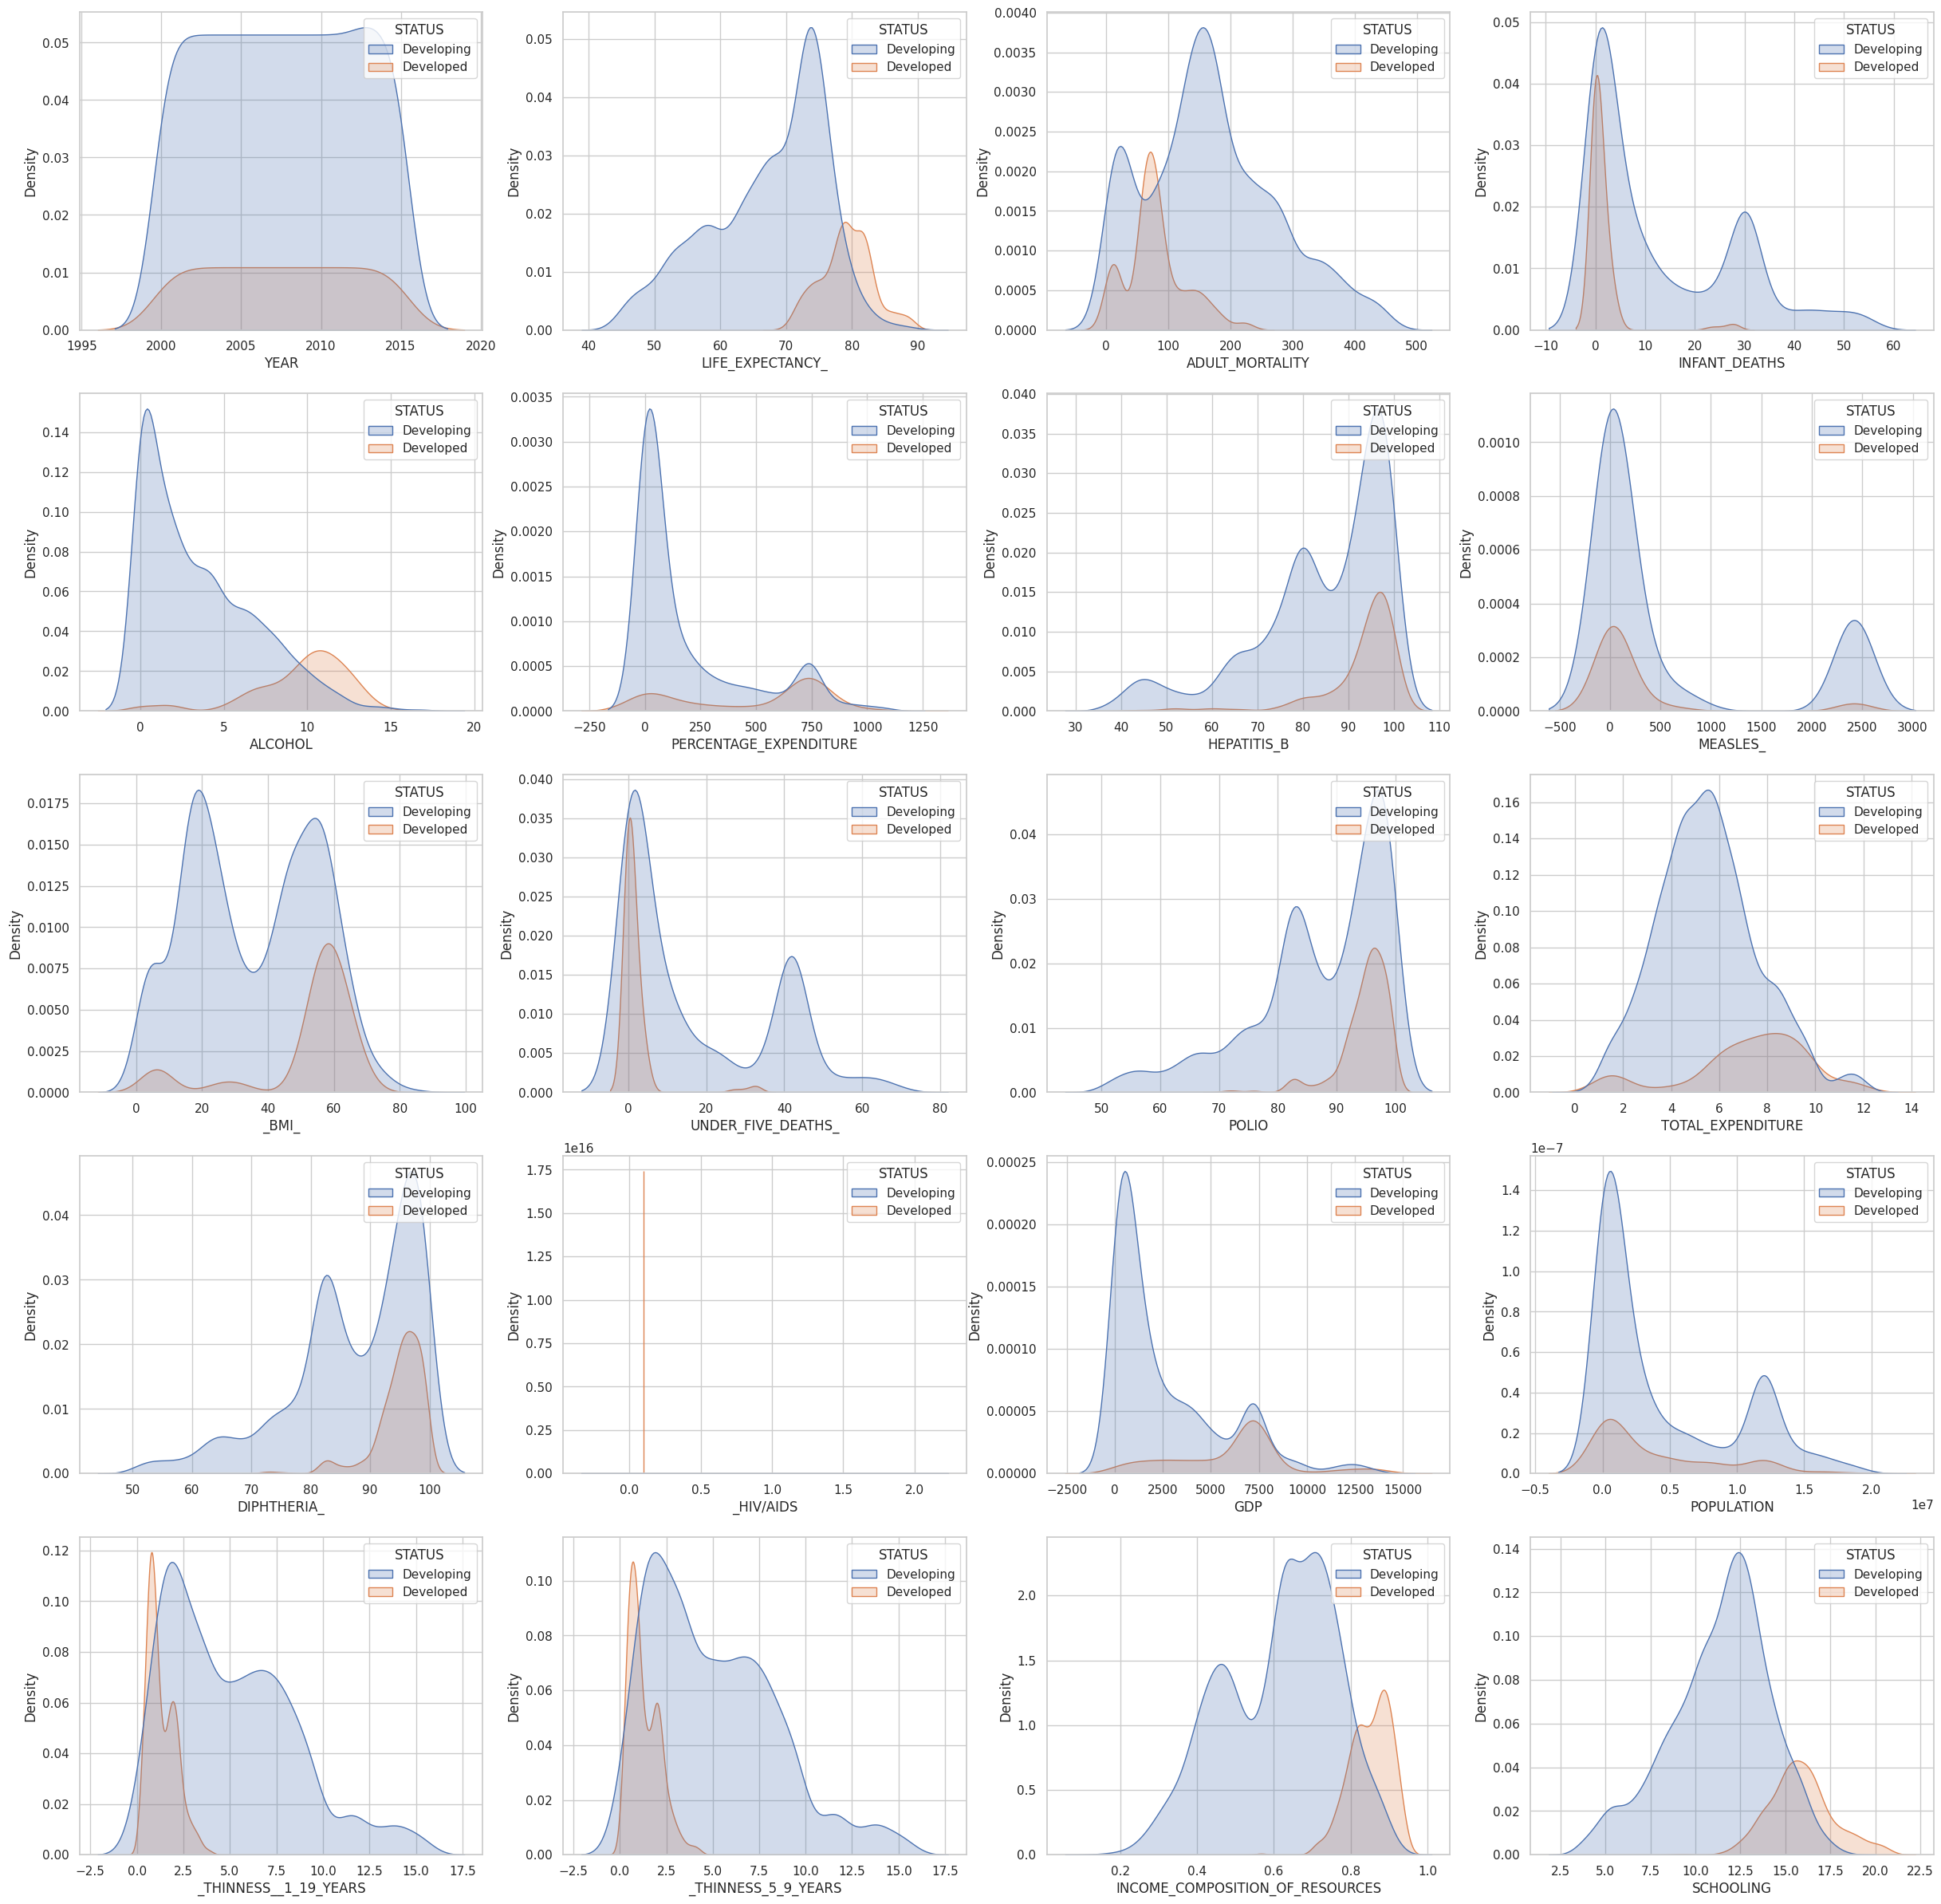

In [23]:
fig = plt.figure(figsize=(30,30))

counter = 0

for col in numerical_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col,data=life_expectancy_dt,fill=True,hue="STATUS")
    plt.xticks()
    counter = counter + 1

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from xgboost import XGBRegressor

# split data into input and output columns
X = life_expectancy_dt[["SCHOOLING", "INCOME_COMPOSITION_OF_RESOURCES", "GDP", "DIPHTHERIA_", "_BMI_", "POLIO"]]
y = life_expectancy_dt["LIFE_EXPECTANCY_"]
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 2.443 (0.104)


In [30]:
from numpy import asarray
# split dataset into input and output columns
X = life_expectancy_dt[["SCHOOLING", "INCOME_COMPOSITION_OF_RESOURCES", "GDP", "DIPHTHERIA_", "_BMI_", "POLIO"]]
y = life_expectancy_dt["LIFE_EXPECTANCY_"]
# define model
model = XGBRegressor()
# fit model
model.fit(X, y)
# define new data
row = [2000.00,2000.00, 2000.00,2000.00,2000.00,2000.00]
new_data = asarray([row])
# make a prediction
age_prediction = model.predict(new_data)
# summarize prediction
print('Predicted age for input: %.3f' % age_prediction)

Predicted age for input: 86.061


<ipython-input-30-3ffffa2321e1>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted age for input: %.3f' % age_prediction)
